In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("glaucoma_preprocessed.csv")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
data.describe()


KeyboardInterrupt



In [5]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ] 

In [6]:
print ( "classes are : " , np.unique ( Y ) )  

classes are :  [0. 1.]


In [7]:
X.shape


(634, 65536)

In [8]:
Y.shape

(634,)

split data train/test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

In [10]:
model=svm.SVC(gamma='scale')

In [11]:
model.fit(X_train,Y_train)

SVC()

In [12]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.7696335078534031


In [13]:
from sklearn.metrics import confusion_matrix 
y_pred = model.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[  0,  44],
       [  0, 147]], dtype=int64)

In [14]:
# Fit the model to the training data
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
Y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))


Accuracy: 0.7696335078534031
Precision: 0.7696335078534031
Recall: 1.0
F1 Score: 0.8698224852071006


In [17]:
# Assuming 'cm' is your confusion matrix
cm = np.array([[0, 44], [0, 147]])

# Calculate Sensitivity
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Sensitivity: ", sensitivity)


Sensitivity:  1.0


In [21]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP / (TP + FN)
print(f'Sensitivity: {sensitivity}')

# Specificity or true negative rate
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

Sensitivity: 1.0
Specificity: 0.0


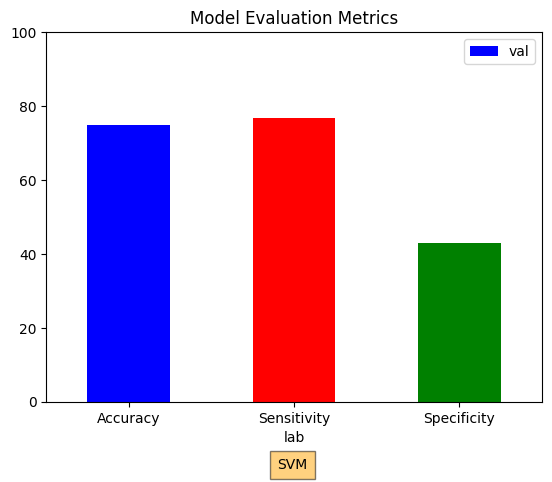

In [43]:

# Create DataFrame
df = pd.DataFrame({
    'lab': ['Accuracy', 'Sensitivity', 'Specificity'],
    'val': [75, 76.9, 43.1]
})

# Create bar chart
ax = df.plot.bar(x='lab', y='val', rot=0, color=['b', 'r', 'g'])
plt.ylim([0.0, 100.0])
plt.title('Model Evaluation Metrics')
plt.figtext(0.51, -0.03, "SVM", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show("SVM")


In [50]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test is your true labels and y_pred_svm and y_pred_rf are your predicted labels from SVM and Random Forest respectively
report_svm = classification_report(Y_test, y_pred, output_dict=True)
df_svm = pd.DataFrame(report_svm).transpose()

df_svm


E:\study material\miniproject-2\miniproject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\study material\miniproject-2\miniproject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\study material\miniproject-2\miniproject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,precision,recall,f1-score,support
0.0,0.000000,0.000000,0.000000,44.000000
1.0,0.769634,1.000000,0.869822,147.000000
accuracy,0.769634,0.769634,0.769634,0.769634
macro avg,0.384817,0.500000,0.434911,191.000000
weighted avg,0.592336,0.769634,0.669445,191.000000
